# Project 2
### Objective: Forecasting the price for a given product of a company in a univariate or multivariate setting (with information respecting the market competitors). 

### Importing packages

In [1]:
import os
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import ConvLSTM2D
from keras.layers import Flatten


import tensorflow as tf
from tensorflow import keras

In [2]:
bestmodels = {}

### Importing data

In [8]:
product_group_id = 958
data_wide = pd.read_pickle("time_series/Data/time_series_1/wide_product_group_id_" + str(product_group_id))
data = data_wide.iloc[:,0]
data

if os.path.isdir('figures') == False:
    os.mkdir("figures")
if os.path.isdir('figures/Univariate') == False:
    os.mkdir("figures/Univariate")
if os.path.isdir('figures/Multivariate') == False:
    os.mkdir("figures/Multivariate")

In [9]:
data_wide.columns

Index(['Abcdin', 'Falabella', 'Lider', 'Paris', 'Ripley', 'claro', 'entel',
       'movistar', 'wom', 'vtr', 'macOnline'],
      dtype='object')

## Data Visualization

In [10]:
data_wide.describe()

,Abcdin,Falabella,Lider,Paris,Ripley,claro,entel,movistar,wom,vtr,macOnline
count,439.000000,299.000000,247.000000,311.000000,362.000000,495.000000,309.000000,507.000000,226.000000,0.0,0.0
mean,205.236445,260.083446,208.552038,211.745065,220.196328,219.285643,295.715809,208.389614,221.639998,NaN,NaN
std,14.598443,41.238329,33.199671,25.921554,19.177624,8.158182,4.986046,26.482101,7.747160,NaN,NaN
min,181.924861,172.828163,181.924861,163.731465,181.924861,181.924861,294.514691,191.021559,207.295552,NaN,NaN
25%,200.118257,209.214955,181.924861,200.118257,209.214955,218.311653,294.514691,191.021559,212.862731,NaN,NaN
50%,209.214955,291.085236,209.214955,209.214955,218.311653,218.311653,294.514691,200.118257,227.408351,NaN,NaN
75%,209.214955,291.085236,227.408351,209.214955,227.408351,218.311653,294.514691,227.408351,227.408351,NaN,NaN
max,291.085236,300.181934,300.181934,300.181934,291.085236,245.601747,316.346766,291.085236,229.236787,NaN,NaN


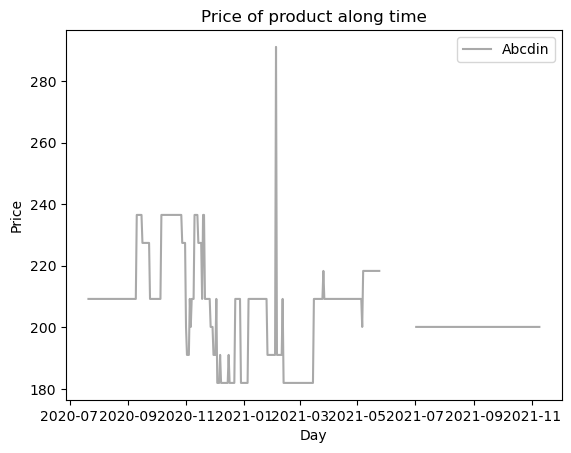

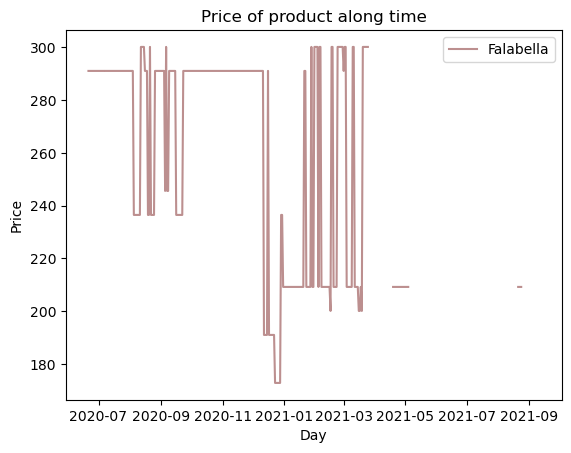

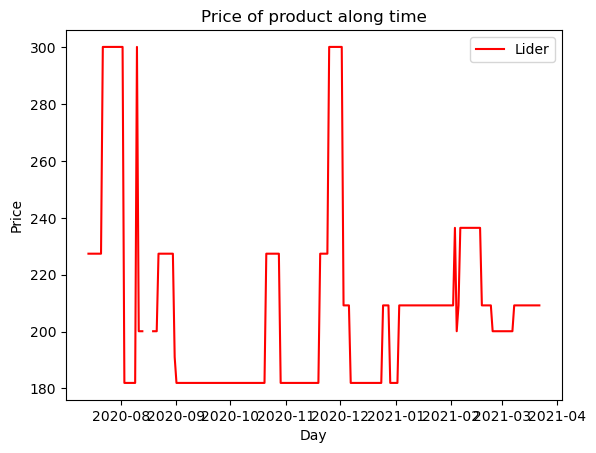

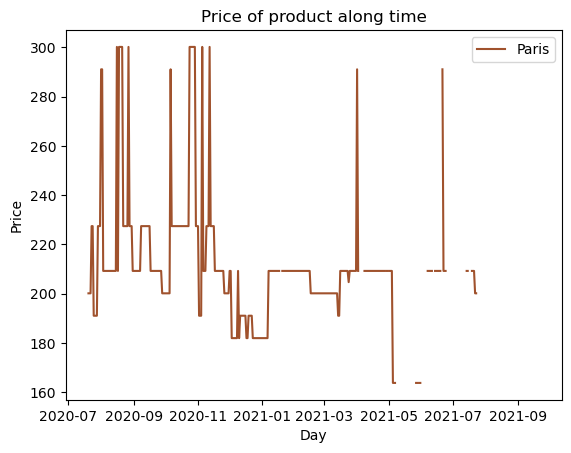

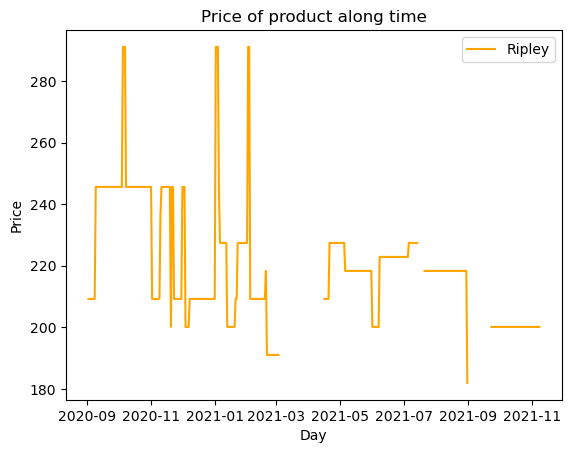

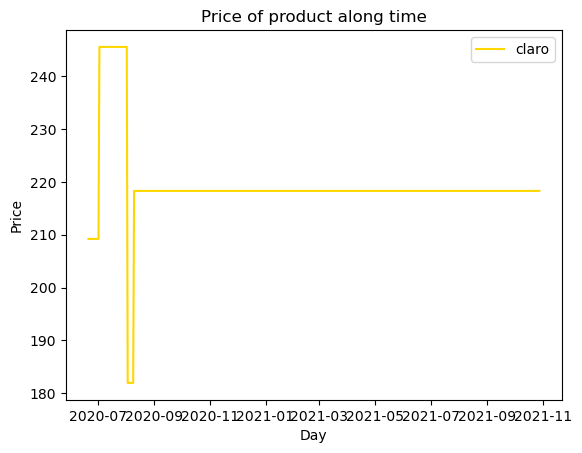

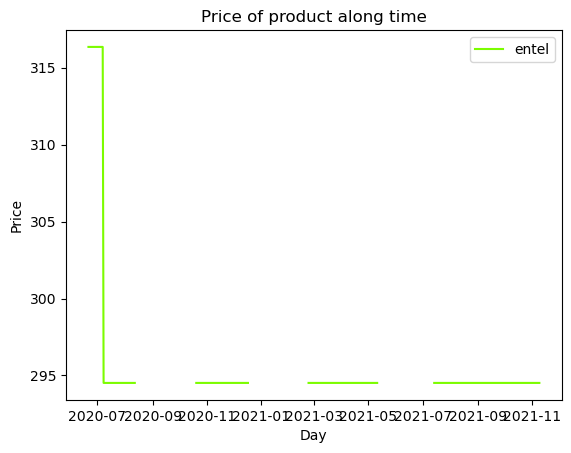

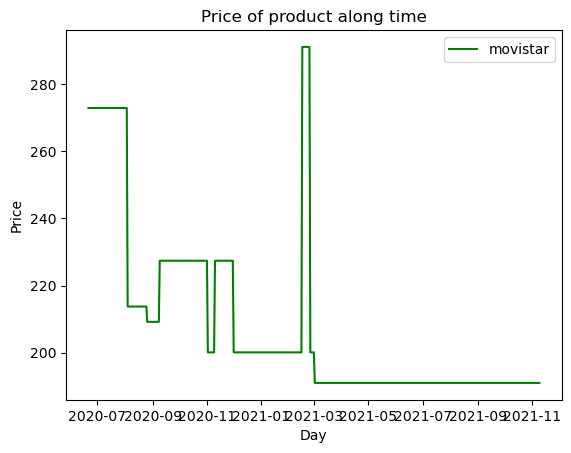

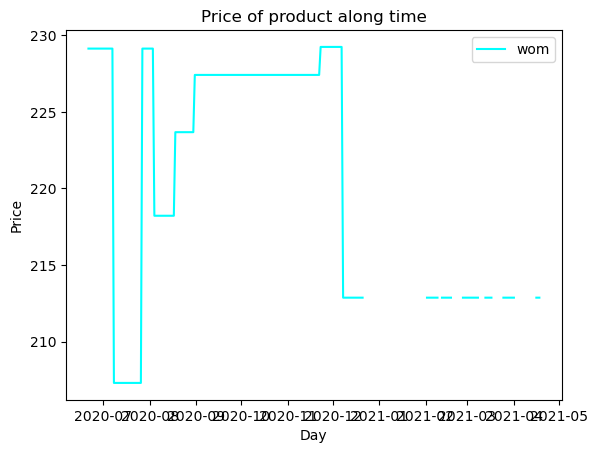

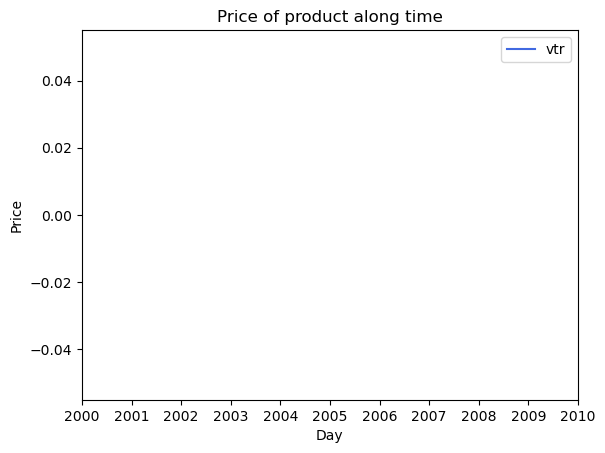

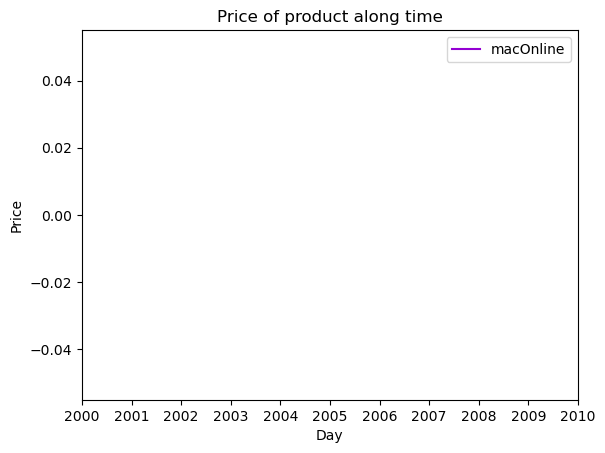

In [11]:
X = data_wide.index
colors = ["darkgray", "rosybrown", "red", "sienna", "orange", "gold", "lawngreen", "green", "cyan", "royalblue", "darkviolet"]
data_wide.head()
legend = []
for company, color in zip(data_wide.columns, colors):
    plt.figure()
    plt.plot(data_wide[company], color=color)
    plt.title("Price of product along time")
    plt.legend([company])
    plt.ylabel('Price')
    plt.xlabel('Day')
    plt.savefig("figures/"+company+"_data_plots.jpeg", bbox_inches="tight")
    plt.show()
    

## Univariate


### Pre processamente do dataset
Caso os dados iniciais do dataset tenham valores em falta iremos remover esses dados do dataset, e posteriormente isto iremos preencher valores que estejam em falta ao longo da série temporal. 

In [80]:
for i in range(len(data)):
    if (math.isnan(data[i]) == False):
        data = data[i:]
        break;

In [81]:
data

2020-07-21    209.214955
2020-07-22    209.214955
2020-07-23    209.214955
2020-07-24    209.214955
2020-07-25    209.214955
                 ...    
2021-11-05    200.118257
2021-11-06    200.118257
2021-11-07    200.118257
2021-11-08    200.118257
2021-11-09    200.118257
Freq: D, Name: Abcdin, Length: 477, dtype: float64

In [82]:
data1 = data.interpolate()

In [83]:
for i in range(len(data)):
    print(data[i],":",data1[i])

209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.2149549713454 : 209.2149549713454
209.21495497

Após o pré processamento

In [84]:
data1.describe()

count    477.000000
mean     205.553391
std       14.119251
min      181.924861
25%      200.118257
50%      209.214955
75%      209.214955
max      291.085236
Name: Abcdin, dtype: float64

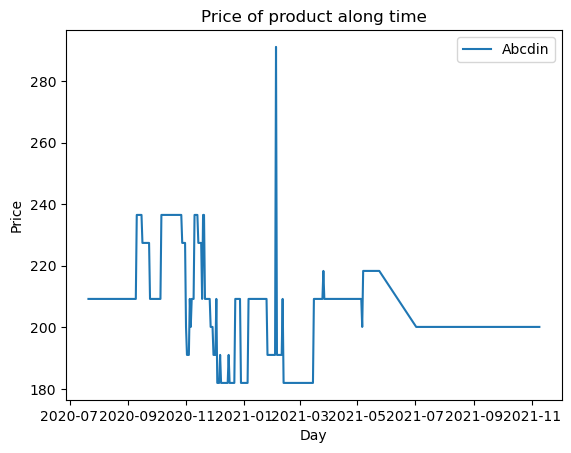

In [85]:
plt.figure()
plt.plot(data1)
plt.title("Price of product along time")
plt.legend([data1.name])
plt.ylabel('Price')
plt.xlabel('Day')
plt.savefig("figures/uni"+data1.name+"_data_plots.jpeg", bbox_inches="tight")
plt.show()

Definição de funções para fazer samples através de uma sequência

In [86]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Vanilla LSTM
Iremos variar o número de steps, para encontrar os hiperparâmetros que construir o modelo que tem a melhor performance, tendo em conta o nosso objetivo

In [98]:
min_error = 1000000000000000
best_steps = 0
best_X_train = []
best_X_test = []
best_y_train = []
best_y_test = []
n_features = 1
for n_steps in range (3,20,4):
    X, y = split_sequence(data1, n_steps)
    train_ind = int(X.shape[0]*0.7)
    X_train = X[:train_ind]
    y_train = y[:train_ind]
    X_test = X[train_ind:]
    y_test = y[train_ind:]
    model = Sequential()
    model.add(LSTM(400, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=200, verbose=0)
    mspe = np.zeros((X_test.shape[0],1))
    for i in range(X_test.shape[0]):
        x_input = X_test[i].reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        mspe[i] = (yhat-y_test[i])**2
    error = math.sqrt(np.sum(mspe)/mspe.shape[0])
    if error < min_error:
        model.save("best_vanilla_lstm")
        min_error = error
        best_steps = n_steps
        best_X_train = X_train
        best_X_test = X_test
        best_y_train = y_train
        best_y_test = y_test
    print("Steps: ", n_steps, "\tErro: ", error)
model_info = {"train": [best_X_train, best_y_train], "test": [best_X_test, best_y_test], "parameters": [best_steps, 1]}
bestmodels["Vanilla LSTM"] = model_info

INFO:tensorflow:Assets written to: best_vanilla_lstm\assets
Steps:  3 	Erro:  0.4057078323201816
Steps:  7 	Erro:  5.798995752637897
Steps:  11 	Erro:  4.01957291095989
Steps:  15 	Erro:  0.49453851171481633
Steps:  19 	Erro:  0.7524928662915669


In [99]:
best_X_test = bestmodels["Vanilla LSTM"]["test"][0]
best_y_test = bestmodels["Vanilla LSTM"]["test"][1]
best_X_train = bestmodels["Vanilla LSTM"]["train"][0]
best_y_train = bestmodels["Vanilla LSTM"]["train"][1]
best_steps = bestmodels["Vanilla LSTM"]["parameters"][0]
train_ind = best_y_train.shape[0]

Construção do modelo vanilla LSTM com os melhores parâmetros que foram calculados previamente.

RMSE dos dados do teste e de treino.

In [100]:
train_ind = best_y_train.shape[0]
n_features = 1
model = keras.models.load_model("best_vanilla_lstm")
test_predictions = np.zeros((best_X_test.shape[0],1))
train_predictions = np.zeros((best_X_train.shape[0],1))

mspe = np.zeros((best_X_test.shape[0],1))
for i in range(best_X_test.shape[0]):
    x_input = best_X_test[i].reshape((1, best_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_test[i])**2
    test_predictions[i] = yhat
test_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

mspe = np.zeros((best_X_train.shape[0],1))
for i in range(best_X_train.shape[0]):
    x_input = best_X_train[i].reshape((1, best_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_train[i])**2
    train_predictions[i] = yhat
train_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

print("Erro de treino: ", train_error, "\tErro de test: ", test_error)
bestmodels["Vanilla LSTM"]["error"] = [train_error, test_error]

Erro de treino:  8.7531412304337 	Erro de test:  0.4057078323201816


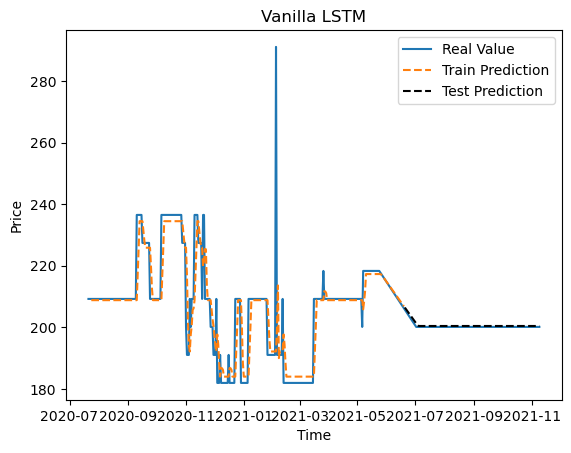

In [101]:
plt.plot(data1.index,data1)
plt.plot(data1.index[best_steps:train_ind+best_steps],train_predictions, '--')
plt.plot(data1.index[train_ind+best_steps:],test_predictions, 'k--')
plt.title('Vanilla LSTM')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['Real Value', 'Train Prediction', 'Test Prediction'], loc='upper right')
plt.savefig('figures/vanilla_lstm.png')
plt.show()

### Stacked LSTM
Iremos encontrar o modelo que tem a melhor performance, variando o número de steps e a quantidade de hidden layers para encontrar os melhores hiperparâmetros.

In [ ]:
min_error = 1000000000000000
best_steps = 0
best_n_layers = 0
n_features = 1
for n_steps in range (3,20,4):
    X, y = split_sequence(data1, n_steps)
    train_ind = int(X.shape[0]*0.7)
    X_train = X[:train_ind]
    y_train = y[:train_ind]
    X_test = X[train_ind:]
    y_test = y[train_ind:]
    for num_layers in range(2,6):
        model = Sequential()
        model.add(LSTM(400, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        for k in range(num_layers-1):
            model.add(LSTM(400, activation='relu', return_sequences=True))
            n_layer = k+1
        model.add(LSTM(400, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=200, verbose=0)
        mspe = np.zeros((X_test.shape[0],1))
        for i in range(X_test.shape[0]):
            x_input = X_test[i].reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            mspe[i] = (yhat-y_test[i])**2
        error = math.sqrt(np.sum(mspe)/mspe.shape[0])
        if error < min_error:
            model.save("best_stacked_lstm")
            min_error = error
            best_steps = n_steps
            best_n_layers = n_layer
            best_steps = n_steps
            best_X_train = X_train
            best_X_test = X_test
            best_y_train = y_train
            best_y_test = y_test
        print("Steps: ",n_steps, "\tNúmero de layers: ", num_layers,"\tErro: ", error)
        
model_info = {"train": [best_X_train, best_y_train], "test": [best_X_test, best_y_test], "parameters": [best_steps, best_n_layers]}
bestmodels["Stacked LSTM"] = model_info

INFO:tensorflow:Assets written to: best_stacked_lstm\assets
Steps:  3 	Número de layers:  2 	Erro:  0.8924409583748307
Steps:  3 	Número de layers:  3 	Erro:  1.8829684083235427
Steps:  3 	Número de layers:  4 	Erro:  2.203205680230708
Steps:  3 	Número de layers:  5 	Erro:  4.326674025807038
INFO:tensorflow:Assets written to: best_stacked_lstm\assets
Steps:  7 	Número de layers:  2 	Erro:  0.5106161956473795
Steps:  7 	Número de layers:  3 	Erro:  1.612504985608042
Steps:  7 	Número de layers:  4 	Erro:  10.730208194524714
Steps:  7 	Número de layers:  5 	Erro:  4.004485489907839
Steps:  11 	Número de layers:  2 	Erro:  10.301562763972981
Steps:  11 	Número de layers:  3 	Erro:  3.3817171312532066


In [ ]:
best_X_test = bestmodels["Stacked LSTM"]["test"][0]
best_y_test = bestmodels["Stacked LSTM"]["test"][1]
best_X_train = bestmodels["Stacked LSTM"]["train"][0]
best_y_train = bestmodels["Stacked LSTM"]["train"][1]
best_steps = bestmodels["Stacked LSTM"]["parameters"][0]
train_ind = best_y_train.shape[0]

Construção do modelo Stacked LSTM com os melhores hiperparâmetros.

RMSE dos dados de teste e de treino.

In [ ]:
train_ind = best_y_train.shape[0]
n_features = 1
model = keras.models.load_model("best_stacked_lstm")
test_predictions = np.zeros((best_X_test.shape[0],1))
train_predictions = np.zeros((best_X_train.shape[0],1))

mspe = np.zeros((best_X_test.shape[0],1))
for i in range(best_X_test.shape[0]):
    x_input = best_X_test[i].reshape((1, best_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_test[i])**2
    test_predictions[i] = yhat
test_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

mspe = np.zeros((best_X_train.shape[0],1))
for i in range(best_X_train.shape[0]):
    x_input = best_X_train[i].reshape((1, best_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_train[i])**2
    train_predictions[i] = yhat
train_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

print("Erro de treino: ", train_error, "\tErro de test: ", test_error)
bestmodels["Stacked LSTM"]["error"] = [train_error, test_error]

In [ ]:
plt.plot(data1.index,data1)
plt.plot(data1.index[best_steps:train_ind+best_steps],train_predictions, '--')
plt.plot(data1.index[train_ind+best_steps:],test_predictions, 'k-')
plt.title('Stacked LSTM')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['Real Value', 'Train Prediction', 'Test Prediction'], loc='upper right')
plt.savefig('figures/stacked_lstm.png')
plt.show()

### ConvLSTM
Iremos encontrar o modelo que tem a melhor performance, variando o número de steps, a quantidade de hidden layers, o kernel e subsequences para encontrar os melhores hiperparâmetros.

In [ ]:
min_error = 1000000000000000
best_steps = 0
best_n_layers = 0
n_features = 1
n_seq = 2
for n_steps in range (6,23,4):
    k = int(n_steps/n_seq)
    X, y = split_sequence(data1, n_steps)
    n_steps = k
    X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
    train_ind = int(X.shape[0]*0.7)
    X_train = X[:train_ind]
    y_train = y[:train_ind]
    X_test = X[train_ind:]
    y_test = y[train_ind:]
    for filters in range(16,64,16):
        model = Sequential()
        model.add(ConvLSTM2D(filters, kernel_size=(1,k), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=200, verbose=0)
        mspe = np.zeros((X_test.shape[0],1))
        for i in range(X_test.shape[0]):
            x_input = X_test[i].reshape((1, n_seq, 1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            mspe[i] = (yhat-y_test[i])**2
        error = math.sqrt(np.sum(mspe)/mspe.shape[0])
        if error < min_error:
            model.save("best_conv_lstm")
            min_error = error
            best_steps = int(n_steps*n_seq)
            best_kernel = k
            best_filters = filters
            best_X_train = X_train
            best_X_test = X_test
            best_y_train = y_train
            best_y_test = y_test
        print("Steps: ",int(n_steps*n_seq), "\t Filter size: ", filters,"\tErro: ", error)
        
model_info = {"train": [best_X_train, best_y_train], "test": [best_X_test, best_y_test], "parameters": [best_steps, 4, n_seq, (1,best_kernel), best_filters]}
bestmodels["ConvLSTM"] = model_info

Construção do modelo ConvLSTM com os melhores hiperparâmetros.

RMSE dos dados de teste e de treino.

In [ ]:
best_X_test = bestmodels["ConvLSTM"]["test"][0]
best_y_test = bestmodels["ConvLSTM"]["test"][1]
best_X_train = bestmodels["ConvLSTM"]["train"][0]
best_y_train = bestmodels["ConvLSTM"]["train"][1]
best_steps = bestmodels["ConvLSTM"]["parameters"][0]
n_seq = bestmodels["ConvLSTM"]["parameters"][2]
train_ind = best_y_train.shape[0]

In [ ]:
train_ind = best_y_train.shape[0]
n_features = 1
model = keras.models.load_model("best_conv_lstm")
test_predictions = np.zeros((best_X_test.shape[0],1))
train_predictions = np.zeros((best_X_train.shape[0],1))

mspe = np.zeros((best_X_test.shape[0],1))
for i in range(best_X_test.shape[0]):
    x_input = best_X_test[i].reshape((1, n_seq, 1, int(best_steps/n_seq), n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_test[i])**2
    test_predictions[i] = yhat
test_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

mspe = np.zeros((best_X_train.shape[0],1))
for i in range(best_X_train.shape[0]):
    x_input = best_X_train[i].reshape((1, n_seq, 1, int(best_steps/n_seq), n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_train[i])**2
    train_predictions[i] = yhat
train_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

print("Erro de treino: ", train_error, "\tErro de test: ", test_error)
bestmodels["ConvLSTM"]["error"] = [train_error, test_error]

In [ ]:
plt.plot(data1.index,data1)
plt.plot(data1.index[best_steps:train_ind+best_steps],train_predictions, '--')
plt.plot(data1.index[train_ind+best_steps:],test_predictions, 'k-')
plt.title('ConvLSTM')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['Real Value', 'Train Prediction', 'Test Prediction'], loc='upper right')
plt.savefig('figures/conv_lstm.png')
plt.show()

## Multivariate

### Pre processamento do dataset

In [12]:
mv_data = data_wide.iloc[:, :-2]
print(mv_data.shape)
mv_data.head()

(507, 9)


,Abcdin,Falabella,Lider,Paris,Ripley,claro,entel,movistar,wom
2020-06-21,NaN,291.085236,NaN,NaN,NaN,209.214955,316.346766,272.89184,229.127627
2020-06-22,NaN,291.085236,NaN,NaN,NaN,209.214955,316.346766,272.89184,229.127627
2020-06-23,NaN,291.085236,NaN,NaN,NaN,209.214955,316.346766,272.89184,229.127627
2020-06-24,NaN,291.085236,NaN,NaN,NaN,209.214955,316.346766,272.89184,229.127627
2020-06-25,NaN,291.085236,NaN,NaN,NaN,209.214955,316.346766,272.89184,229.127627


Tendo em conta o número máximo de valores que estão em falta antes de aparecer um valor, removemos todos as entradas até aí, isto para que todas as séries temporais comecem ao mesmo tempo.

In [13]:
company_values = []
max_index = 0
for company in mv_data:
    company_price = mv_data[company]
    for i in range(len(company_price)):
        if (math.isnan(company_price[i]) == False and i > max_index):
            max_index = i
            break;
mv_data = mv_data[max_index:]
mv_data.shape

(384, 9)

In [14]:
mv_data = mv_data.interpolate(axis=0)

In [15]:
mv_data.describe()

,Abcdin,Falabella,Lider,Paris,Ripley,claro,entel,movistar,wom
count,384.000000,384.000000,384.000000,384.000000,384.000000,3.840000e+02,3.840000e+02,384.000000,384.000000
mean,202.724082,228.711263,209.096508,200.864471,213.265828,2.183117e+02,2.945147e+02,198.531073,214.714477
std,13.134806,36.401996,17.285632,21.343362,17.009386,1.992115e-12,1.764445e-12,17.573068,4.973907
min,181.924861,172.828163,181.924861,163.731465,181.924861,2.183117e+02,2.945147e+02,191.021559,212.862731
25%,200.118257,209.214955,209.214955,191.021559,200.118257,2.183117e+02,2.945147e+02,191.021559,212.862731
50%,200.118257,209.214955,209.214955,200.118257,209.214955,2.183117e+02,2.945147e+02,191.021559,212.862731
75%,209.214955,239.234058,209.214955,209.214955,222.860002,2.183117e+02,2.945147e+02,200.118257,212.862731
max,291.085236,300.181934,300.181934,300.181934,291.085236,2.183117e+02,2.945147e+02,291.085236,229.236787


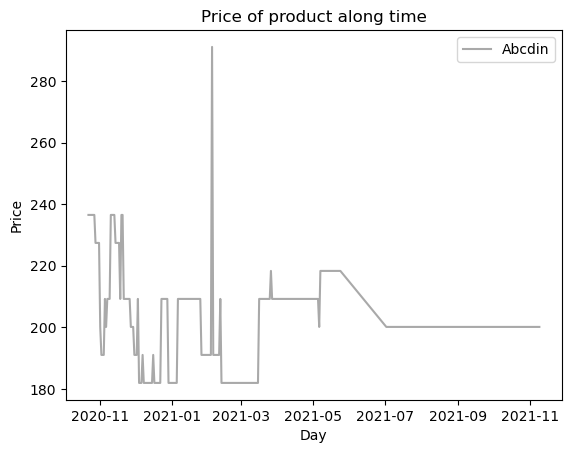

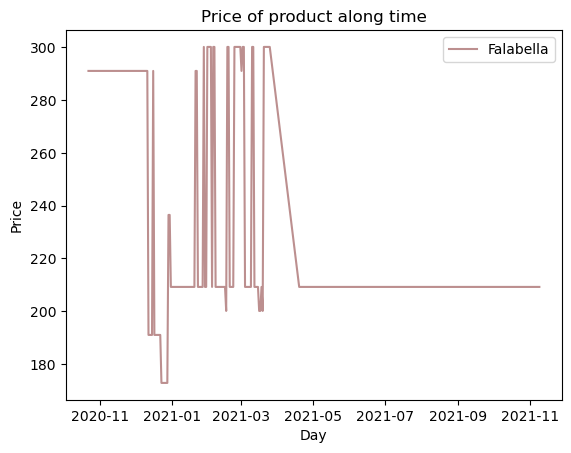

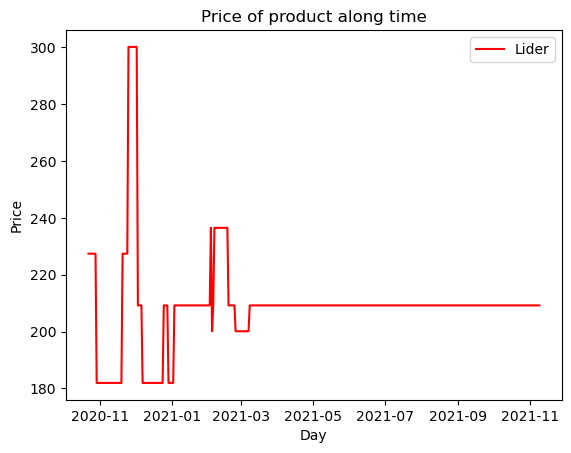

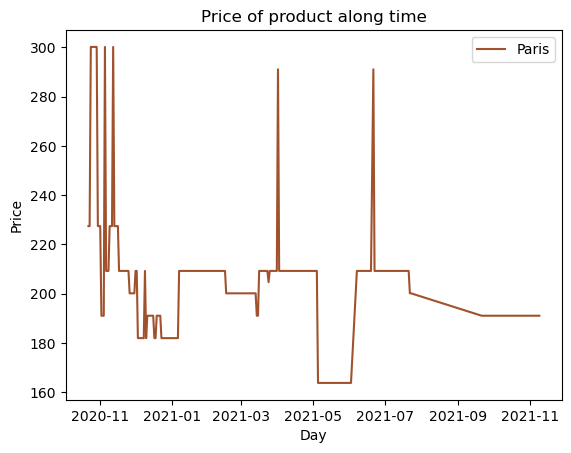

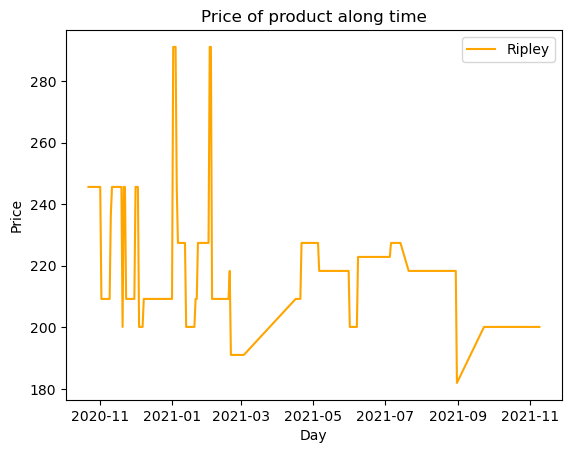

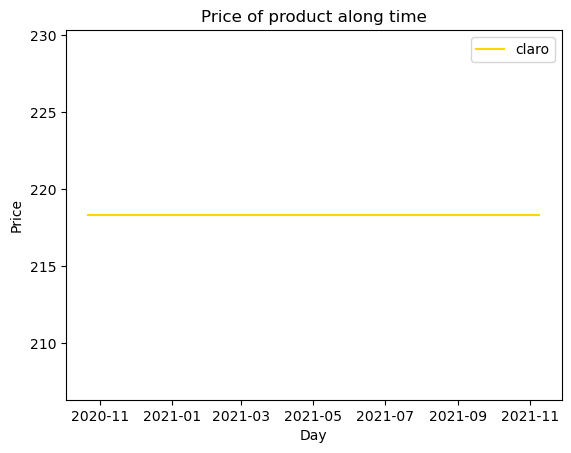

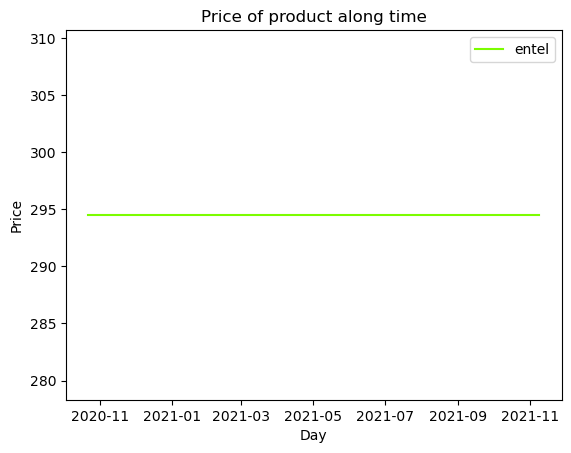

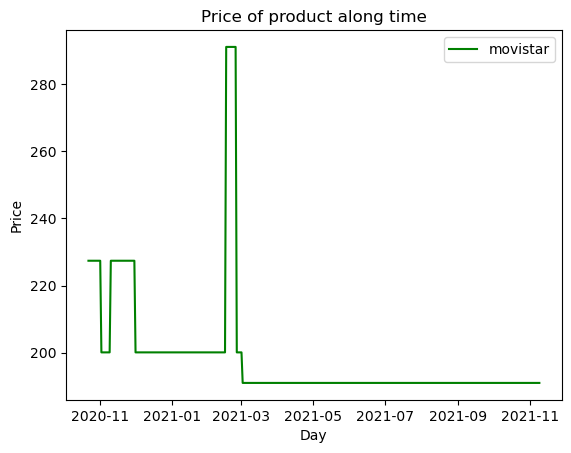

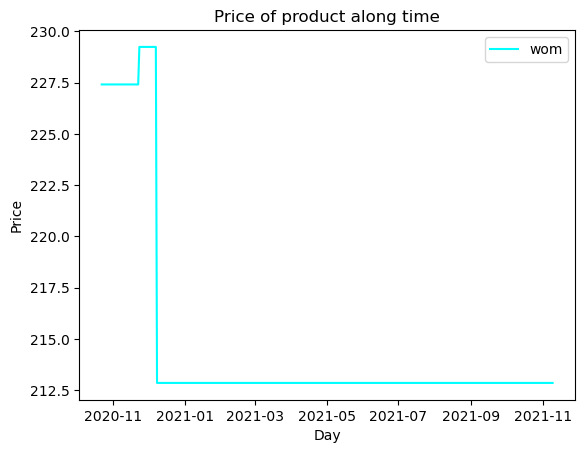

In [16]:
colors = ["darkgray", "rosybrown", "red", "sienna", "orange", "gold", "lawngreen", "green", "cyan", "royalblue", "darkviolet"]
mv_data.head()
legend = []
for company, color in zip(mv_data.columns, colors):
    plt.figure()
    plt.plot(mv_data[company], color=color)
    plt.title("Price of product along time")
    plt.legend([company])
    plt.ylabel('Price')
    plt.xlabel('Day')
    plt.savefig("figures/mv_"+company+"_data_plots.jpeg", bbox_inches="tight")
    plt.show()
    

In [17]:
mv_matrix = mv_data.to_numpy()

In [18]:
# split a multivariate sequence into samples
def multi_split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Multiple Input Series LSTM

In [19]:
min_error = 1000000000000000
best_steps = 0
best_n_layers = 0
for n_steps in range (3,19,4):
    X, y = multi_split_sequences(mv_matrix, n_steps)
    train_ind = int(X.shape[0]*0.7)
    n_features = X[0].shape[1]
    X_train = X[:train_ind]
    y_train = y[:train_ind]
    X_test = X[train_ind:]
    y_test = y[train_ind:]
    for num_layers in range(2,6):
        model = Sequential()
        model.add(LSTM(400, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        for k in range(num_layers-1):
            model.add(LSTM(400, activation='relu', return_sequences=True))
            n_layer = k+1
        model.add(LSTM(400, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=200, verbose=0)
        mspe = np.zeros((X_test.shape[0],1))
        for i in range(X_test.shape[0]):
            x_input = X_test[i].reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            mspe[i] = (yhat-y_test[i][0])**2
        error = math.sqrt(np.sum(mspe)/mspe.shape[0])
        if error < min_error:
            model.save("best_multi_stacked_lstm")
            min_error = error
            best_steps = n_steps
            best_n_layers = n_layer
            best_steps = n_steps
            best_X_train = X_train
            best_X_test = X_test
            best_y_train = y_train
            best_y_test = y_test
        print("Steps: ",n_steps, "\tNúmero de layers: ", num_layers,"\tErro: ", error)

model_info = {"train": [best_X_train, best_y_train], "test": [best_X_test, best_y_test], "parameters": [best_steps, best_n_layers]}
bestmodels["Multiple Input Series LSTM"] = model_info

INFO:tensorflow:Assets written to: best_multi_stacked_lstm\assets


Steps:  3 	Número de layers:  2 	Erro:  18.401847618233635
INFO:tensorflow:Assets written to: best_multi_stacked_lstm\assets


INFO:tensorflow:Assets written to: best_multi_stacked_lstm\assets


Steps:  3 	Número de layers:  3 	Erro:  14.878183727584476
Steps:  3 	Número de layers:  4 	Erro:  19.386442050326544
Steps:  3 	Número de layers:  5 	Erro:  15.442695522046186
Steps:  7 	Número de layers:  2 	Erro:  17.716297058832406
Steps:  7 	Número de layers:  3 	Erro:  18.886586542687095
Steps:  7 	Número de layers:  4 	Erro:  15.978045467396166
Steps:  7 	Número de layers:  5 	Erro:  16.446645400689146
Steps:  11 	Número de layers:  2 	Erro:  22.104686423630458
Steps:  11 	Número de layers:  3 	Erro:  15.978473355324642
Steps:  11 	Número de layers:  4 	Erro:  15.751593913522518
Steps:  11 	Número de layers:  5 	Erro:  24.91914725436858


KeyboardInterrupt: 

In [21]:
best_X_test = bestmodels["Multiple Input Series LSTM"]["test"][0]
best_y_test = bestmodels["Multiple Input Series LSTM"]["test"][1]
best_X_train = bestmodels["Multiple Input Series LSTM"]["train"][0]
best_y_train = bestmodels["Multiple Input Series LSTM"]["train"][1]
best_steps = bestmodels["Multiple Input Series LSTM"]["parameters"][0]
train_ind = best_y_train.shape[0]

Construção do modelo Multiple Input Series LSTM com os melhores hiperparâmetros.

RMSE dos dados de teste e de teste.

In [22]:
train_ind = best_y_train.shape[0]
n_features = n_features = X[0].shape[1]
model = keras.models.load_model("best_multi_stacked_lstm")
train_predictions = np.zeros((best_X_train.shape[0],1))
test_predictions = np.zeros((best_X_test.shape[0],1))

mspe = np.zeros((best_X_test.shape[0],1))
for i in range(best_X_test.shape[0]):
    x_input = best_X_test[i].reshape((1, best_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_test[i][0])**2
    test_predictions[i] = yhat
test_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

mspe = np.zeros((best_X_train.shape[0],1))
for i in range(best_X_train.shape[0]):
    x_input = best_X_train[i].reshape((1, best_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    mspe[i] = (yhat-best_y_train[i][0])**2
    train_predictions[i] = yhat
train_error = math.sqrt(np.sum(mspe)/mspe.shape[0])

print("Erro de treino: ", train_error, "\tErro de test: ", test_error)
bestmodels["Multiple Input Series LSTM"]["error"] = [train_error, test_error]

Erro de treino:  22.78133173135271 	Erro de test:  14.878183727584476


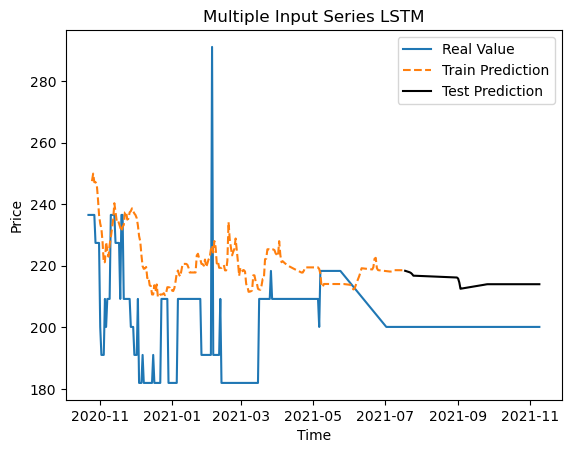

In [23]:
plt.plot(mv_data.index,mv_data["Abcdin"])
plt.plot(mv_data.index[best_steps:train_ind+best_steps],train_predictions, '--')
plt.plot(mv_data.index[train_ind+best_steps:],test_predictions, 'k-')
plt.title('Multiple Input Series LSTM')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['Real Value', 'Train Prediction', 'Test Prediction'], loc='upper right')
plt.savefig('figures/mv_stacked_lstm.png')
plt.show()